In [1]:
import numpy as np
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import os
import sys
from scipy import signal
import game_of_life as gol
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

# Setting up video encoder paths
ff_path = os.path.join('C:/', 'ImageMagick-7.0.9-Q16', 'ffmpeg.exe')
plt.rcParams['animation.ffmpeg_path'] = ff_path
if ff_path not in sys.path: sys.path.append(ff_path)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [77]:
importlib.reload(gol)

<module 'game_of_life' from 'C:\\Users\\arttu.lehtinen\\Desktop\\general_DataScience\\gameOfLife\\game_of_life.py'>

### Introduction

Jeff Conway’s Game of life is a cellular automata model that demonstrates how complexity can emerge in a very simple setting. It is used for example in Richards Dawkins book … to support the argument that evolution of complex organisms can be possible without an intelligent designer. In this project I implemented   Game of Life in Python just for shit and giggles and here I show couple of interesting results that this system can produce.

The world of game of life is a 2D grid which consisting of cells. These cells can have one of two states: they are alive or they are dead.  

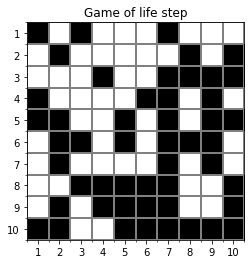

In [80]:
Size=10
world_array=np.random.choice([0, 1], size=(Size,Size))
ax=gol.plot_step(world_array)

In [79]:
world_array

array([[0, 1],
       [1, 1]])